### import modules

In [15]:
#import modules
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import os
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [58]:
# create a function to download first table
data = []
def table_1(link):
    driver = webdriver.Chrome(ChromeDriverManager().install())
    driver.get(link)
    html = driver.page_source

    tables = pd.read_html(html)
    data.append(tables)
       
    driver.close()   

In [59]:
#create a second function to download the remaining 61 tables
data1 = []
def table_2(link,i):
    driver = webdriver.Chrome(ChromeDriverManager().install())
    for i in range(0,6200,100):
        i = i+101
        driver.get(link+str(i))
        html = driver.page_source

        tables = pd.read_html(html)
        data1.append(tables)

    driver.close()    

In [60]:
#pass the url to table 1
table_1('https://www.the-numbers.com/movie/budgets/all')

In [61]:
# load the first table
data[0][0]

,Unnamed: 0,ReleaseDate,Movie,ProductionBudget,DomesticGross,WorldwideGross
0,1,"Apr 23, 2019",Avengers: Endgame,"$400,000,000","$858,373,000","$2,797,800,564"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$379,000,000","$241,071,802","$1,045,713,802"
2,3,"Apr 22, 2015",Avengers: Age of Ultron,"$365,000,000","$459,005,868","$1,395,316,979"
3,4,"Dec 16, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,064,615,817"
4,5,"Apr 25, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,359,754"
...,...,...,...,...,...,...
95,96,"Dec 16, 2021",The Matrix Resurrections,"$190,000,000","$37,686,805","$156,467,817"
96,97,"Nov 25, 2015",The Good Dinosaur,"$187,500,000","$123,087,120","$333,771,037"
97,98,"May 2, 2008",Iron Man,"$186,000,000","$318,604,126","$585,171,547"
98,99,"Jul 11, 2008",The Dark Knight,"$185,000,000","$533,720,947","$998,615,789"


In [62]:
#pass the url and page number to remaining 61 tables
table_2('https://www.the-numbers.com/movie/budgets/all/',101)

In [64]:
#load last table to check for errors
data1[61][0]

,Unnamed: 0,ReleaseDate,Movie,ProductionBudget,DomesticGross,WorldwideGross
0,6201,"Jul 17, 2015",Dawn of the Crescent Moon,"$75,000","$8,799","$8,799"
1,6202,"Sep 29, 2015",Queen Crab,"$75,000",$0,$0
2,6203,"Jul 25, 2014",Happy Christmas,"$70,000","$30,312","$30,312"
3,6204,"Jan 28, 2005","Peace, Propaganda and the Promised Land","$70,000","$4,930","$4,930"
4,6205,"Apr 11, 2013",Absentia,"$70,000",$0,"$8,555"
...,...,...,...,...,...,...
86,6287,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
87,6288,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
88,6289,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
89,6290,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"


In [65]:
#tests the array to save
for i in range(-1,0):
    i=i+1
    print('data['+str(i)+'][0]')

data[0][0]


In [67]:
#save first table to csv
for i in range(-1,0):
    i=i+1
    data[i][0].to_csv('file'+str(i)+'.csv')

In [71]:
#save remaining tables to csv
for i in range(-1,61):
    i=i+1
    data1[i][0].to_csv('file'+str(i+1)+'.csv')

In [93]:
#combines all the csvs into one file called total_movies.csv
files = [file for file in os.listdir('./files')]
movies_data  = pd.DataFrame()
for file in files:
    df = pd.read_csv('./files/'+file)
    movies_data = pd.concat([movies_data, df])
    
movies_data.to_csv('total_movies.csv')

In [2]:
total_movies = pd.read_csv('total_movies.csv')
total_movies

,Unnamed: 0,ReleaseDate,Movie,ProductionBudget,DomesticGross,WorldwideGross
0,0,"Apr 23, 2019",Avengers: Endgame,"$400,000,000","$858,373,000","$2,797,800,564"
1,1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$379,000,000","$241,071,802","$1,045,713,802"
2,2,"Apr 22, 2015",Avengers: Age of Ultron,"$365,000,000","$459,005,868","$1,395,316,979"
3,3,"Dec 16, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,064,615,817"
4,4,"Apr 25, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,359,754"
...,...,...,...,...,...,...
6286,6286,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
6287,6287,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
6288,6288,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
6289,6289,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"


In [3]:
#remove columns not needed
total_movies.drop(['ReleaseDate','Movie','DomesticGross','Unnamed: 0'], axis = 1, inplace=True)
total_movies

,ProductionBudget,WorldwideGross
0,"$400,000,000","$2,797,800,564"
1,"$379,000,000","$1,045,713,802"
2,"$365,000,000","$1,395,316,979"
3,"$306,000,000","$2,064,615,817"
4,"$300,000,000","$2,048,359,754"
...,...,...
6286,"$6,000","$240,495"
6287,"$5,000","$1,338"
6288,"$1,400",$0
6289,"$1,100","$181,041"


## Linear Regression

In [4]:
# removes $ and , from the values
total_movies['ProductionBudget'] = total_movies['ProductionBudget'].str.replace('$','').str.replace(',','')
total_movies['WorldwideGross'] = total_movies['WorldwideGross'].str.replace('$','').str.replace(',','')
total_movies

,ProductionBudget,WorldwideGross
0,400000000,2797800564
1,379000000,1045713802
2,365000000,1395316979
3,306000000,2064615817
4,300000000,2048359754
...,...,...
6286,6000,240495
6287,5000,1338
6288,1400,0
6289,1100,181041


In [5]:
#change data type from string to float
total_movies['ProductionBudget'] = pd.to_numeric(total_movies['ProductionBudget'])
total_movies['WorldwideGross'] = pd.to_numeric(total_movies['WorldwideGross'])

In [6]:
total_movies

,ProductionBudget,WorldwideGross
0,400000000,2797800564
1,379000000,1045713802
2,365000000,1395316979
3,306000000,2064615817
4,300000000,2048359754
...,...,...
6286,6000,240495
6287,5000,1338
6288,1400,0
6289,1100,181041


In [7]:
# extract movies with $0 worldwide gross
total_movies[total_movies['WorldwideGross']<=0]

,ProductionBudget,WorldwideGross
8,290000000,0
235,150000000,0
260,140000000,0
347,120000000,0
359,115000000,0
...,...,...
6272,12000,0
6279,10000,0
6285,7000,0
6288,1400,0


In [6]:
# remove movies with $0 worldwide gross
df = total_movies[(total_movies != 0).all(1)]
df

,ProductionBudget,WorldwideGross
0,400000000,2797800564
1,379000000,1045713802
2,365000000,1395316979
3,306000000,2064615817
4,300000000,2048359754
...,...,...
6283,7000,71644
6284,7000,900
6286,6000,240495
6287,5000,1338


In [7]:
df.describe()

,ProductionBudget,WorldwideGross
count,5.882000e+03,5.882000e+03
mean,3.364359e+07,9.836874e+07
std,4.320829e+07,1.862189e+08
min,1.100000e+03,1.700000e+01
25%,6.000000e+06,6.662037e+06
50%,1.810000e+07,3.235482e+07
75%,4.200000e+07,1.030949e+08
max,4.000000e+08,2.845900e+09


In [9]:
X= df['ProductionBudget']
y=df['WorldwideGross']
X = X.to_frame()

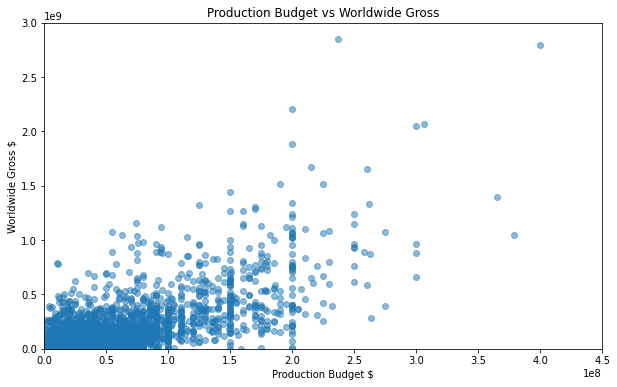

In [22]:
#plots the graph of production budget against worldwide gross
plt.figure(figsize=(10,6))
plt.scatter(X,y, alpha = 0.5)
plt.title('Production Budget vs Worldwide Gross')
plt.xlabel('Production Budget $')
plt.ylabel('Worldwide Gross $')
plt.ylim(0,3000000000)
plt.xlim(0, 450000000)
#plt.savefig('plot.png', bbox_inches='tight')
plt.show()

In [16]:
#creates an object of linear regression
regression = LinearRegression()

In [17]:
#run the regression model
regression.fit(X, y)

LinearRegression()

In [18]:
#slope coefficient
regression.coef_

array([3.1730714])

In [19]:
#calculates the intercept
regression.intercept_

-8384779.075378269

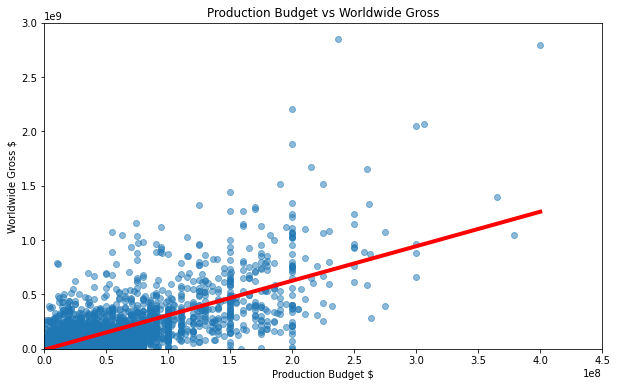

In [23]:
#plots the regression line 
plt.figure(figsize=(10,6))
plt.scatter(X,y, alpha = 0.5)

plt.plot(X, regression.predict(X), color = 'red', linewidth = 4)

plt.title('Production Budget vs Worldwide Gross')
plt.xlabel('Production Budget $')
plt.ylabel('Worldwide Gross $')
plt.ylim(0,3000000000)
plt.xlim(0, 450000000)
plt.show()

In [21]:
#test of model accuracy
regression.score(X,y)

0.5420586681359129

In [50]:
#top 10 worldwide gross vs predicted gross
df['PredictedGross'] = regression.predict(X).round(8)
pd.set_option('display.float_format', lambda x: '%.0f' % x)
df.head(10)

,ProductionBudget,WorldwideGross,PredictedGross
0,400000000,2797800564,1260843782
1,379000000,1045713802,1194209283
2,365000000,1395316979,1149786283
3,306000000,2064615817,962575070
4,300000000,2048359754,943536642
5,300000000,960996492,943536642
6,300000000,655945209,943536642
7,300000000,879500760,943536642
9,275000000,1072848487,864209857
10,275000000,393151347,864209857


In [49]:
df.drop(['Predicted'], axis = 1, inplace = True)